<a href="https://colab.research.google.com/github/Maryanne-Muthoni/IP/blob/main/IP_HYPOTHESIS_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Descriptive Statistics

## 1. Defining the Question

### a) Problem Statement

> **The Question**

We are investigating the claim that the number of Blue cars taken in postal code 75001 is greater on weekdays than in area 75016.



> **Hypothesis**

Null hypothesis: The number of Blue cars taken in area 75016 on weekdays is not greater than in postal code 75001.

Alternate hypothesis (claim of researcher): The number of Blue cars taken in postal code 75001 is greater on weekdays than in area 75016.

HO: Σ *(75001)* = Σ *(75016)*

Ha: Σ *(75001)* > Σ *(75016)*


### b) Data Description

> **Random variable**

Blue cars taken is the random variable which we will investigate in different days and areas.

> **Defining the Metric for Success**

The end goal of this analysis is answer the question by to carry out the following processes:

i). Data cleaning: Find and deal with outliers, anomalies, and missing data within the dataset.

ii). Data exploration:Perform univariate, bivariate and multivariate analysis and record observations.

iii).Implement the solution by performing hypothesis testing.

> **Understanding the context**

Investigate a claim about the blue cars from the provided Autolib dataset as we work as a Data Scientist for the Autolib electric car-sharing service company.

> Recording the Experimental Design

First data cleaning then Univariate, bivariate and multivariate summaries, sampling and finally hypothesis testing.

### c) Hypothesis testing procedure

1. sampling
2. Stating the hypothesis
3.Choose the significance level.
4. Use test statistic which in this case is the t test
5. Conclusion

## 2. Importing the relevant libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 3. Reading the Data

In [123]:
# Loading the Data from the source i.e. csv
# Dataset url = /content/autolib_daily_events_postal_code.csv

df= pd.read_csv('/content/autolib_daily_events_postal_code.csv')

df


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


## 4. Checking the Data

In [124]:
# Determining the no. of records in our dataset

df.shape

(16085, 13)

In [125]:
# Previewing the top of our dataset

df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [126]:
# Previewing the bottom of our dataset

df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [127]:
# Checking whether each column has an appropriate datatype

df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## 5. Tidying the Dataset

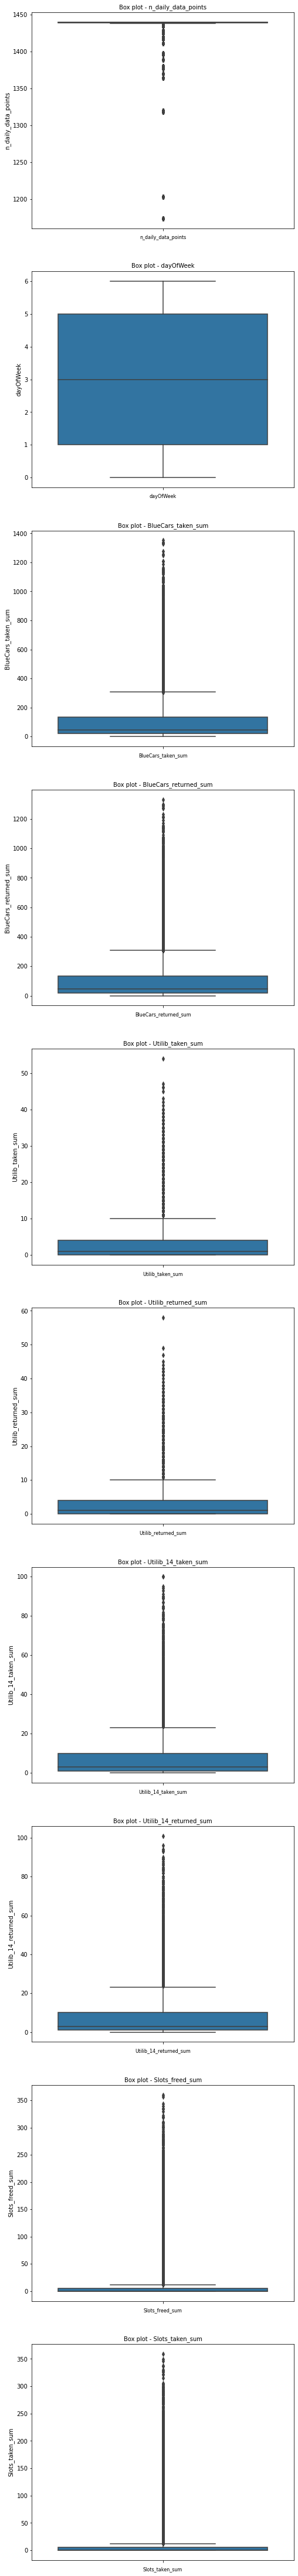

In [128]:
# Checking for Outliers
#plotting a box plot to detect outliers for all numerical variables
#columns being plotted are household size and age.
#Not checking for postal code.

df_new= df.drop(['Postal code','date','day_type'], axis=1)

col_names = ['n_daily_data_points','dayOfWeek','BlueCars_taken_sum','BlueCars_returned_sum','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(8,80))

for i, col_val in enumerate(col_names):

  sns.boxplot(y=df[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

#Researcher has chosen outliers will remain

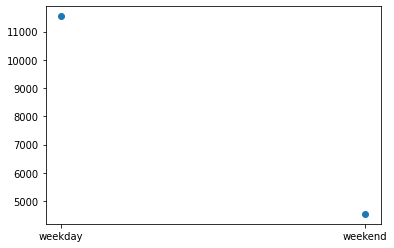

In [129]:
#plotting a scatter plot to detect outliers for categorical variables
#Not checking outliers for date.

#1). Day type
Outliers_day=df['day_type'].value_counts().rename_axis('day_type').reset_index(name='counts')
Outliers_day
plt.scatter(Outliers_day['day_type'],Outliers_day['counts'])
plt.show()
#No outliers.


In [149]:
#Checking for Anomalies for random variable being investigated which is "Blue cars taken"

#Using IQR
#Find IQR then lower and higher bound

q1_blue = df['BlueCars_taken_sum'].quantile(.25)
q3_blue= df['BlueCars_taken_sum'].quantile(.75)
iqr_blue = q3_blue - q1_blue
iqr_blue

l_bound = q1_blue - (1.5 * iqr_blue)
u_bound = q3_blue + (1.5 * iqr_blue)

print(l_bound,u_bound)

#Any value below 144 and any value above 288 is an anomaly. They will be kept.

-144.0 288.0


In [130]:
# Identifying there are Missing Data.
#Returns false meaning there are no missing values/null values
df.isnull().values.any()

False

## 6. Univariate Exploratory Analysis

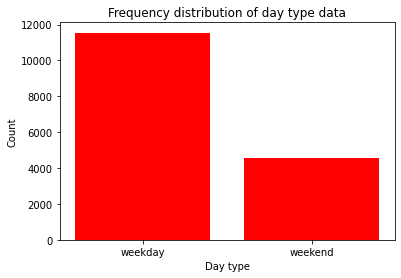

In [131]:
# Ploting the univariate summaries and recording our observations
#First for categorical variables in the data

#1). Country

df_1=df['day_type'].value_counts().rename_axis('day_type').reset_index(name='counts')
df_1

plt.bar(df_1['day_type'],df_1['counts'], color='red')
plt.title('Frequency distribution of day type data')
plt.xlabel('Day type')
plt.ylabel('Count')
plt.show()


In [ ]:
#Observation: Weekdays are more than weekends hence expecting more data from them.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

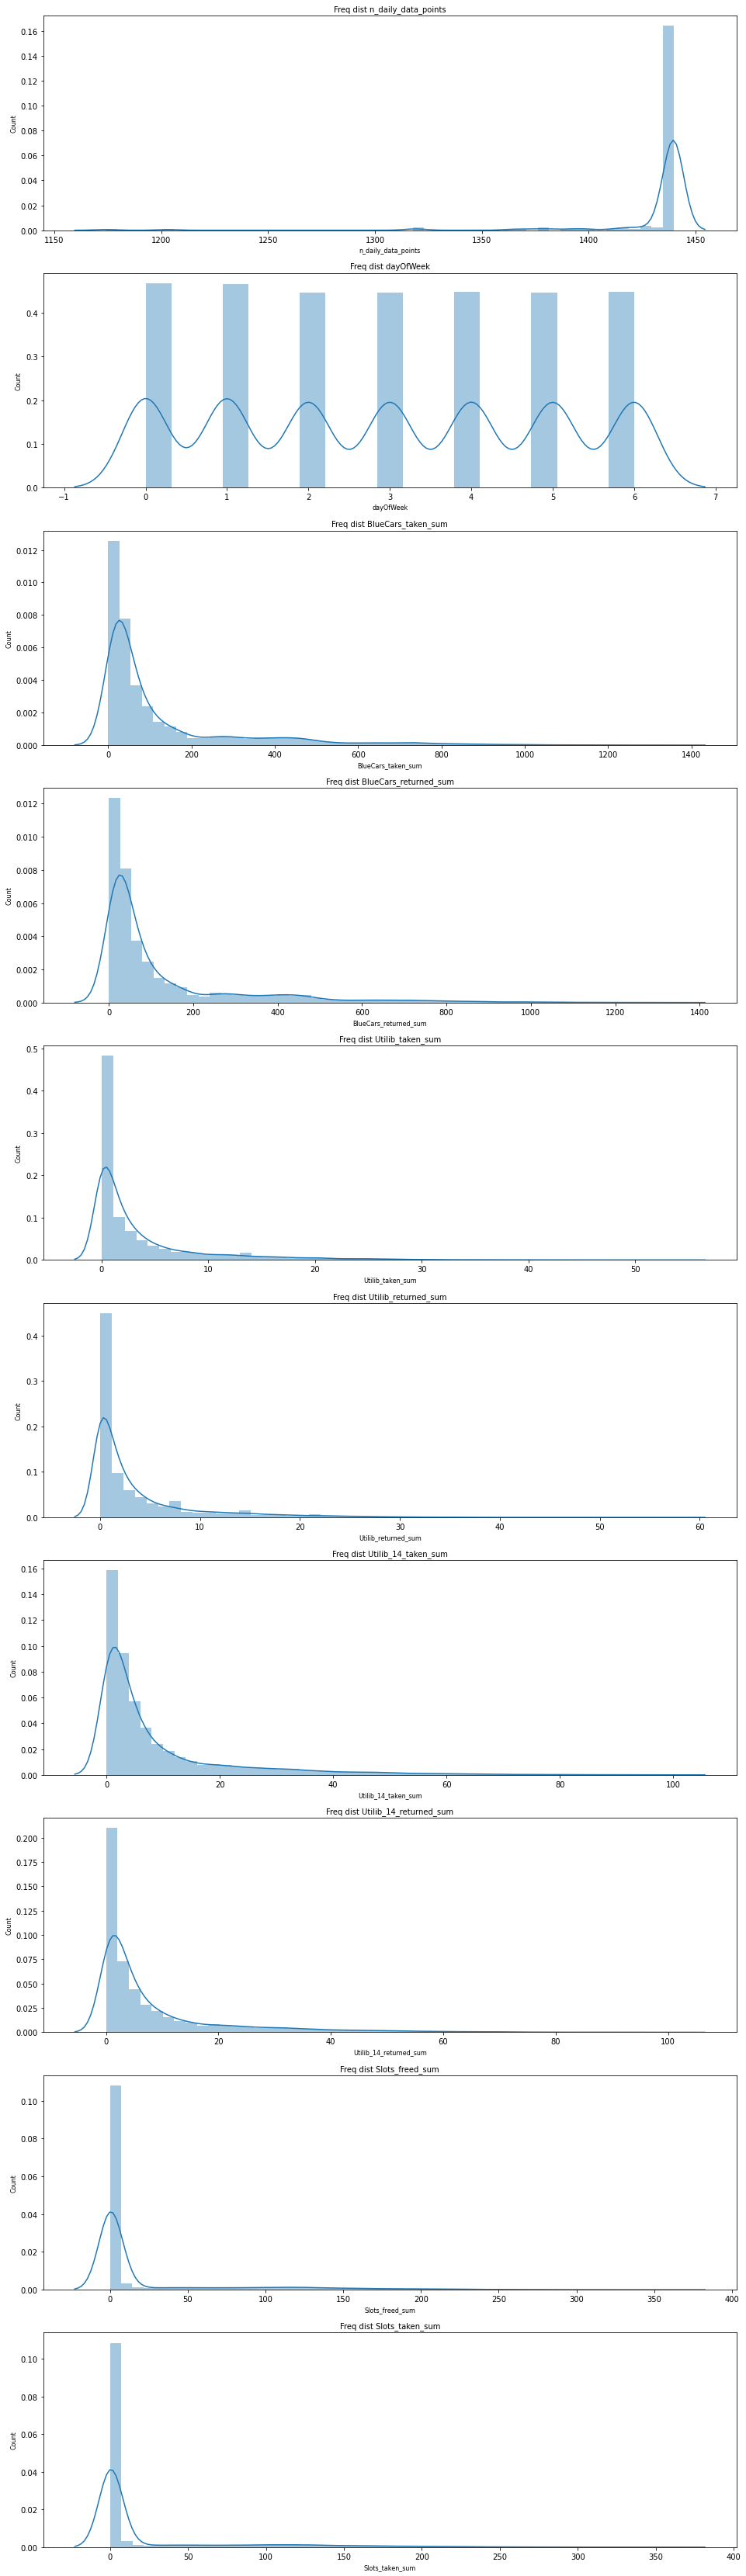

In [132]:
# Ploting the univariate summaries and recording our observations
#Second for numerical variables in the data which are household size and respondent's age



col_names = ['n_daily_data_points','dayOfWeek','BlueCars_taken_sum','BlueCars_returned_sum','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(16,60))

for i, col_val in enumerate(col_names):
        
    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.show()

In [ ]:
#Observation: All numerical values have data that is slightly skewing to the left meaning majority of the data is low lying.

## 7. Bivariate Exploratory Analysis

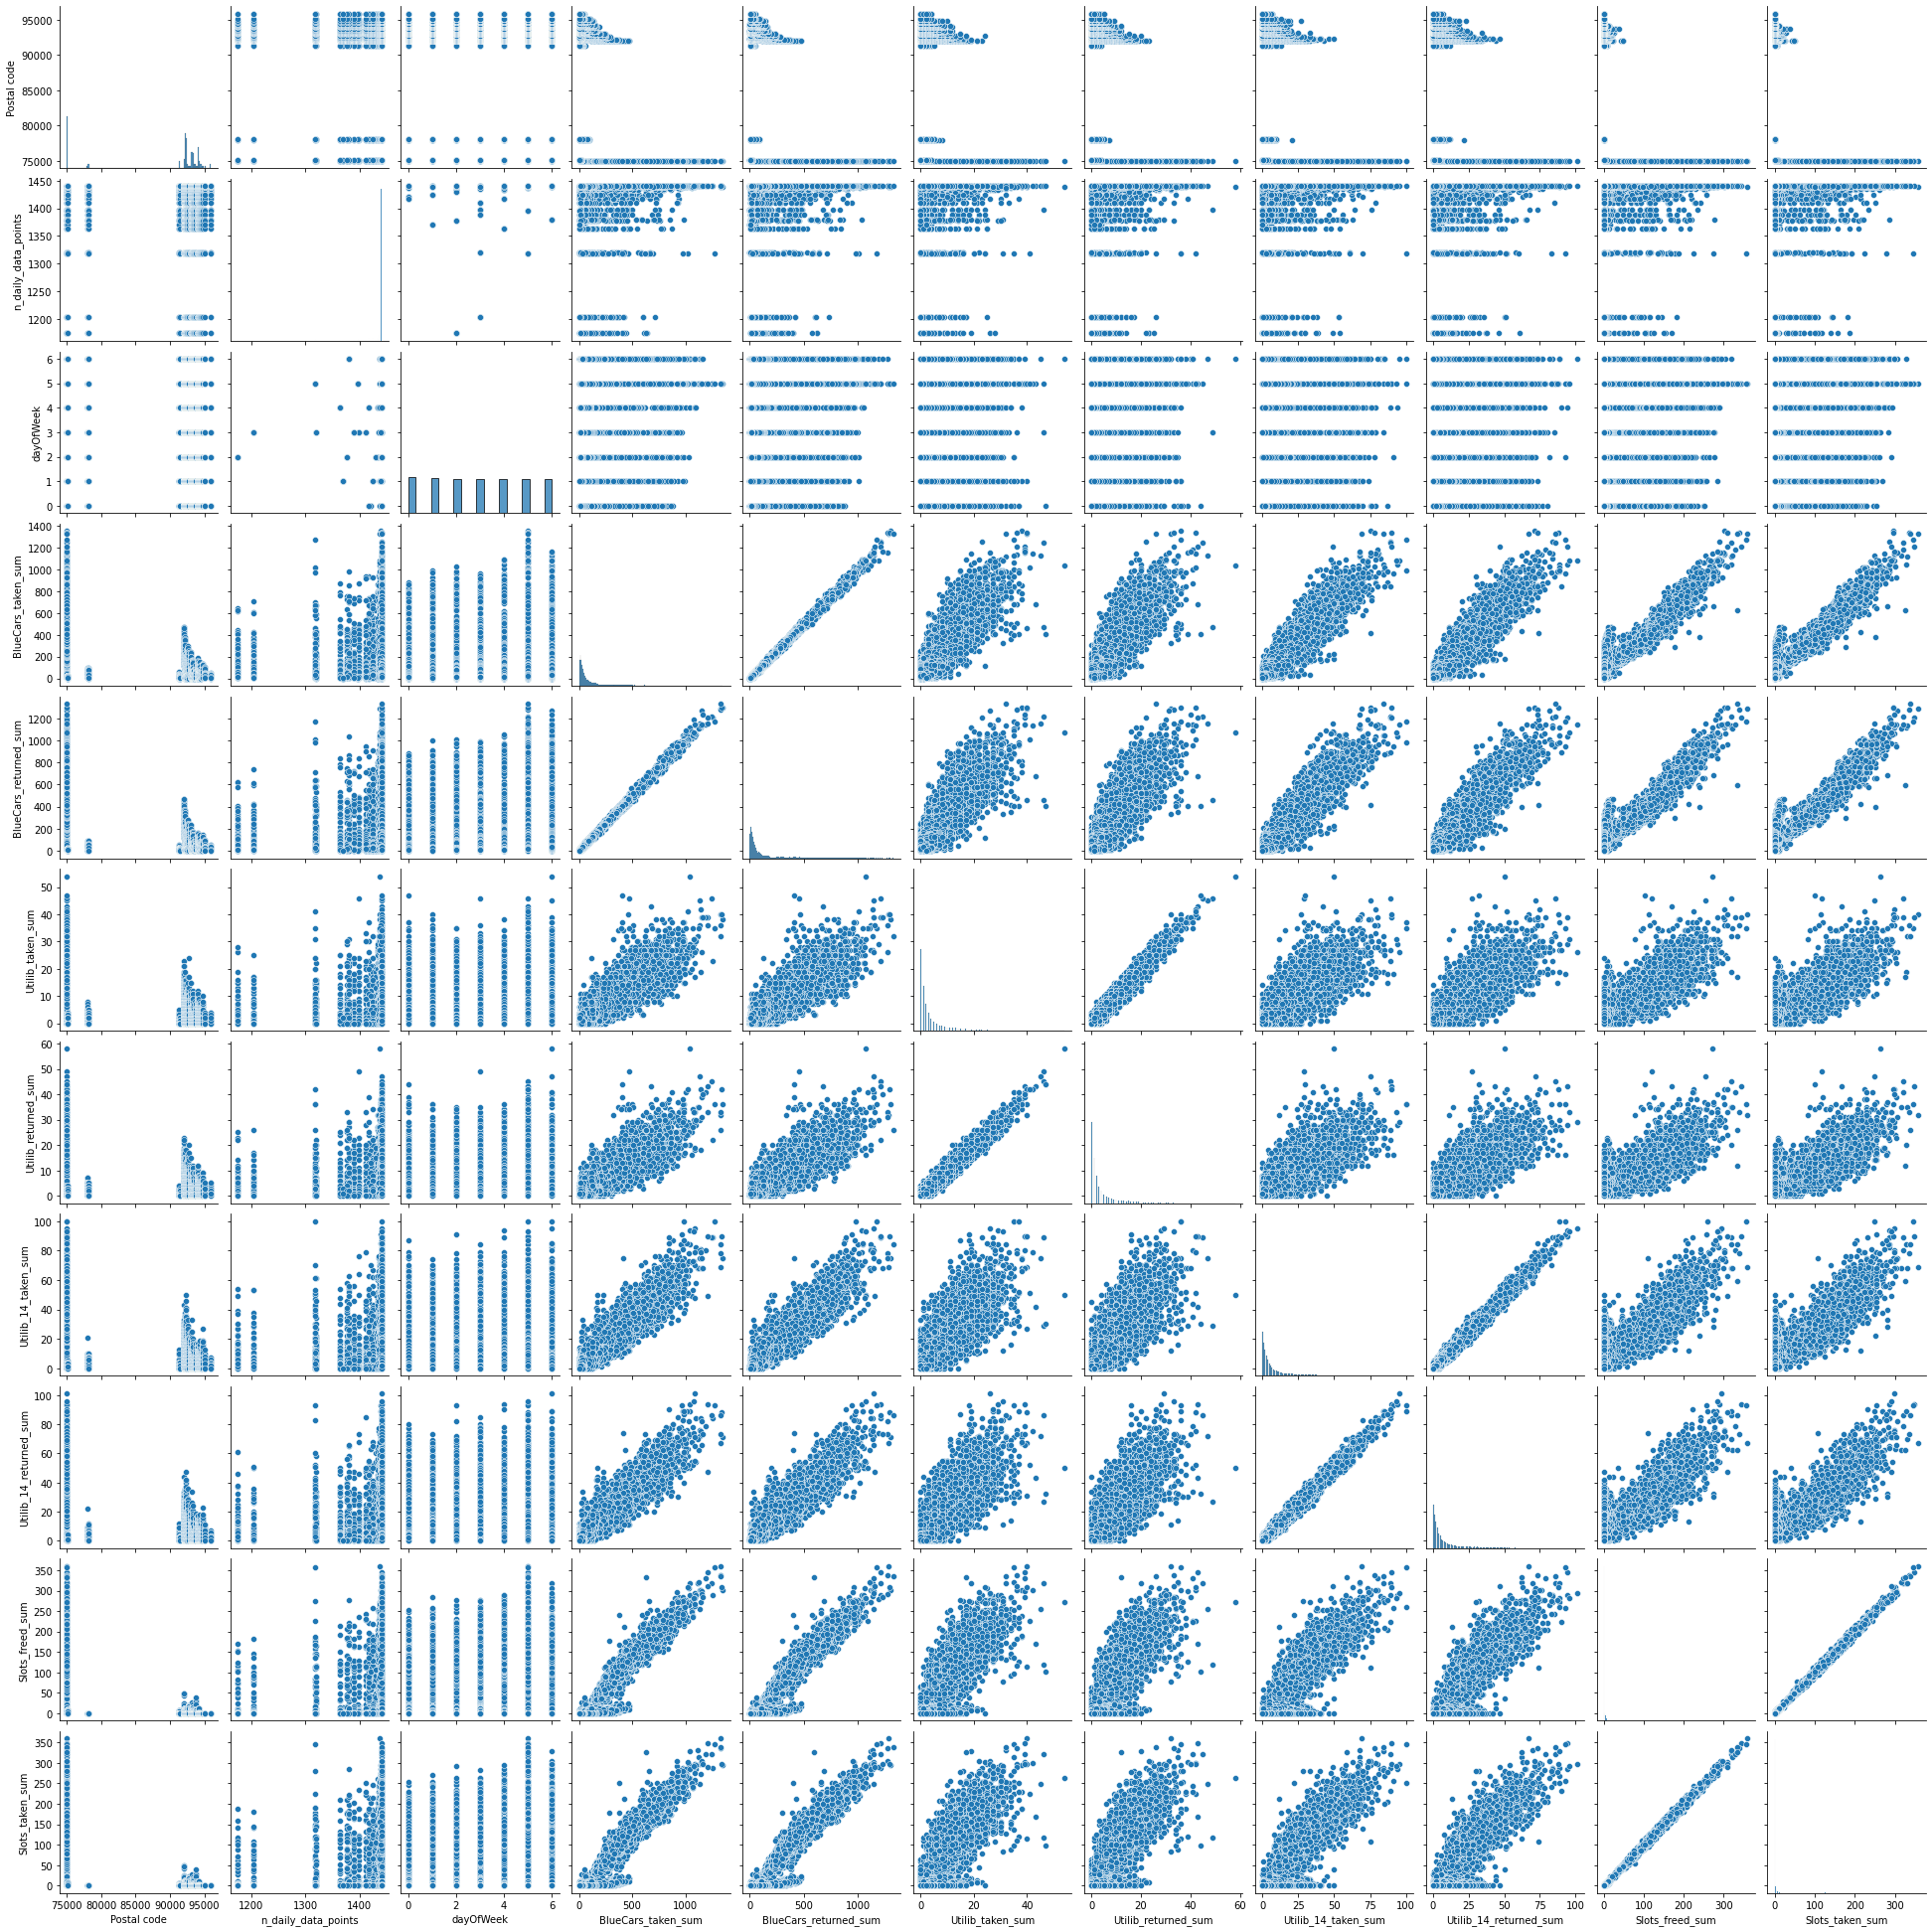

In [24]:
# Ploting the bivariate summaries and recording our observations
#Pair scatter plots

sns.pairplot(df)
plt.show()

In [ ]:
#Observation: There is either no correlation or strong positive correlation between the variables, specifics will be explored in the heat map.

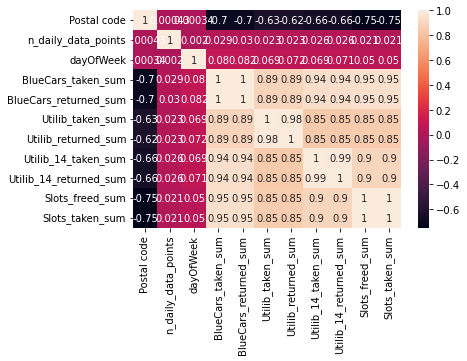

In [25]:

sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#Observation: Most of the variables are strongly positively correlated.

## 8. Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


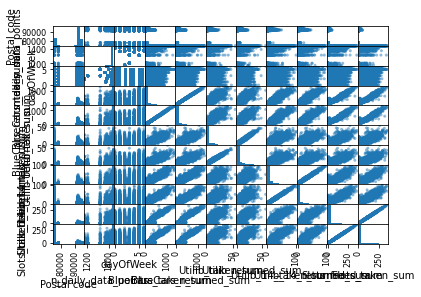

In [139]:
#Plotting a scatter matrix for the numerical data
pd.plotting.scatter_matrix(df)
plt.tight_layout()
plt.show()

In [ ]:
#Observation: Most of the variables are strongly positively correlated.

# Part 2: Hypothesis testing

## 9. Sampling

In [140]:
#Used simple random sampling to pick the samples since it is least likely to have bias.
# 15 samples for each area so we can do a t-test on the data which requires at most 30 samples.

#Samples picked should only be for the weekdays hence delete 'day_type'=='weekend' from data frame.
df.drop(df.index[df['day_type'] == 'weekend'], inplace = True)
df

#Slice data according to the postal codes interested in which are 75001 and 75016 and pick samples.
#75001 slice
x = df.iloc[0:112,:] 
x

#75001 sample
import random
df_sample_1 = x.sample(n = 15, replace="False")
df_sample_1


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
60,75001,3/5/2018,1440,0,weekday,102,103,1,1,12,12,21,19
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
44,75001,2/14/2018,1440,2,weekday,99,99,2,2,5,4,19,20
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
127,75001,5/22/2018,1438,1,weekday,142,144,4,4,12,12,30,32
70,75001,3/15/2018,1440,3,weekday,134,135,1,1,10,10,22,21
84,75001,3/29/2018,1440,3,weekday,145,144,4,4,9,9,18,18
78,75001,3/23/2018,1440,4,weekday,131,131,2,2,5,5,16,15
30,75001,1/31/2018,1440,2,weekday,108,110,2,2,4,4,13,14
123,75001,5/7/2018,1437,0,weekday,118,115,5,5,6,6,24,24


In [141]:
#75016 slice
y = df.iloc[1680:1792,:]
y

#75016 sample
import random
df_sample_2 = y.sample(n = 15, replace="False")
df_sample_2


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2355,75016,1/16/2018,1440,1,weekday,786,755,24,25,46,52,221,217
2481,75016,6/5/2018,1439,1,weekday,839,804,17,19,63,58,198,192
2370,75016,1/31/2018,1440,2,weekday,781,778,17,17,47,50,185,183
2464,75016,5/8/2018,1425,1,weekday,758,743,16,12,41,39,218,215
2351,75016,1/12/2018,1439,4,weekday,835,815,14,13,38,33,159,160
2491,75016,6/15/2018,1440,4,weekday,909,906,24,25,64,62,201,204
2400,75016,3/5/2018,1440,0,weekday,683,692,12,13,61,52,161,164
2459,75016,5/3/2018,1439,3,weekday,816,802,16,18,59,54,185,187
2393,75016,2/23/2018,1440,4,weekday,764,787,18,22,60,61,181,186
2484,75016,6/8/2018,1438,4,weekday,890,885,21,20,55,56,228,226


## 10. Implementing the Solution: Hypothesis  testing

In [142]:
#step 1: Stating the two hypothesis

#Null hypothesis: The number of Blue cars taken in area 75016 on weekdays is greater than in postal code 75001.
#Alternate hypothesis (claim of researcher): The number of Blue cars taken in postal code 75001 is greater on weekdays than in area 75016.

In [143]:
#step 2: Level of significance
alpha=0.05

In [144]:
#step 3: Calculate the Test Statistic (Two-sample T-test)

In [145]:
#Find variance of both samples
print(np.var(df_sample_1['BlueCars_taken_sum']), np.var(df_sample_2['BlueCars_taken_sum']))

444.2222222222223 7044.995555555555


In [146]:
#Do the ratio check to know if it satisfies the condition for the two-sample t-test. Done on the variance to ensure that both of the populations are normally distributed.

ratio_check = np.var(df_sample_2['BlueCars_taken_sum'])/np.var(df_sample_1['BlueCars_taken_sum'])

print(ratio_check)

#The ratio is less than 40:1, thus the variances are considered to be equal.

15.859169584792394


In [147]:
#Applying the two-sample t-test function on samples.
import scipy.stats as stats

print(stats.ttest_ind(a=df_sample_1['BlueCars_taken_sum'], b=df_sample_2['BlueCars_taken_sum'], equal_var=True))

Ttest_indResult(statistic=-28.495424764694285, pvalue=3.1748883755406623e-22)


In [104]:
#step 4: Conclusion

#P-value is 3.1748883755406623e-22 which is which is far less than our alpha of 0.05 therefore we reject the null hypothesis.